## The Metropolis Algorithm

### Code 9.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom, multivariate_normal

In [2]:
num_islands = 10
num_weeks = 100000
positions = np.zeros(num_weeks)
current = num_islands - 1

for i in range(num_weeks):
    positions[i] = current 
    # computations modulo 10 so that the if-statments in text can be avoided
    proposal = (current + np.random.choice([-1, 1])) % num_islands 
    
    # since the islands are numbered 0-9, we add a 1 to the numerator and denom 
    prob_move = min((proposal + 1) / (current + 1), 1.0)
    
    coin_toss = binom.rvs(n=1, p=prob_move)
    current = proposal if coin_toss == 1 else current

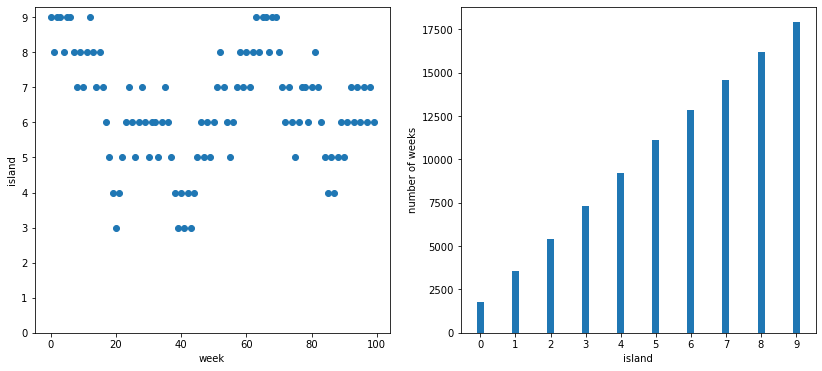

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(range(100), positions[:100])
ax1.set_xlabel('week')
ax1.set_ylabel('island')
ax1.set_yticks(range(10))
ax1.set_yticklabels(range(0, 10))

counts, _ = np.histogram(positions, bins=num_islands)
ax2.bar(range(10), height=counts, width=0.2)

ax2.set_ylabel("number of weeks")
ax2.set_xlabel("island")

ax2.set_xticks(range(10))
ax2.set_xticklabels(range(0, 10))

plt.show()

### Code 9.4

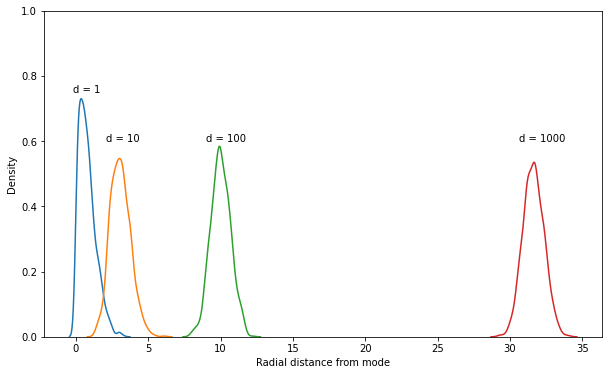

In [4]:
def dist_from_origin(v):
    return np.sqrt(np.sum(v ** 2))

dimensions = [1, 10, 100, 1000]
n_samples = int(1e3)
ht = [0.75, 0.6, 0.6, 0.6]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for d, h in zip(dimensions, ht):
    samples = multivariate_normal(np.zeros(d), np.identity(d)).rvs(n_samples)
    radial_distances = [dist_from_origin(s) for s in samples]
    sns.kdeplot(radial_distances, ax=ax)
    ax.text(np.mean(radial_distances) - 1, h, f"d = {d}")

ax.set_xlabel("Radial distance from mode")
ax.set_ylabel("Density")
ax.set_ylim(0.0, 1.0)

plt.show()